In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zoo-animal-classification/zoo.csv
/kaggle/input/zoo-animal-classification/class.csv


## Data Analysis

In [2]:
data = pd.read_csv('/kaggle/input/zoo-animal-classification/zoo.csv')
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#lets try to assess missing values
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [6]:
classes = pd.read_csv('/kaggle/input/zoo-animal-classification/class.csv')
classes = classes.drop(['Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis = 1)
classes

,Class_Number,Class_Type
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

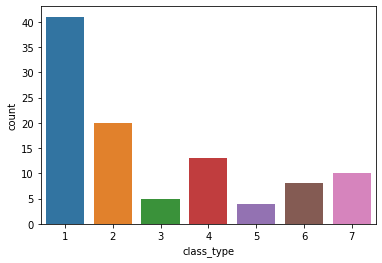

In [7]:
sns.countplot(data['class_type'],label="Count")
pd.Series.value_counts(data['class_type'])

Text(0.5, 1.05, 'Correlation of ZOO Features')

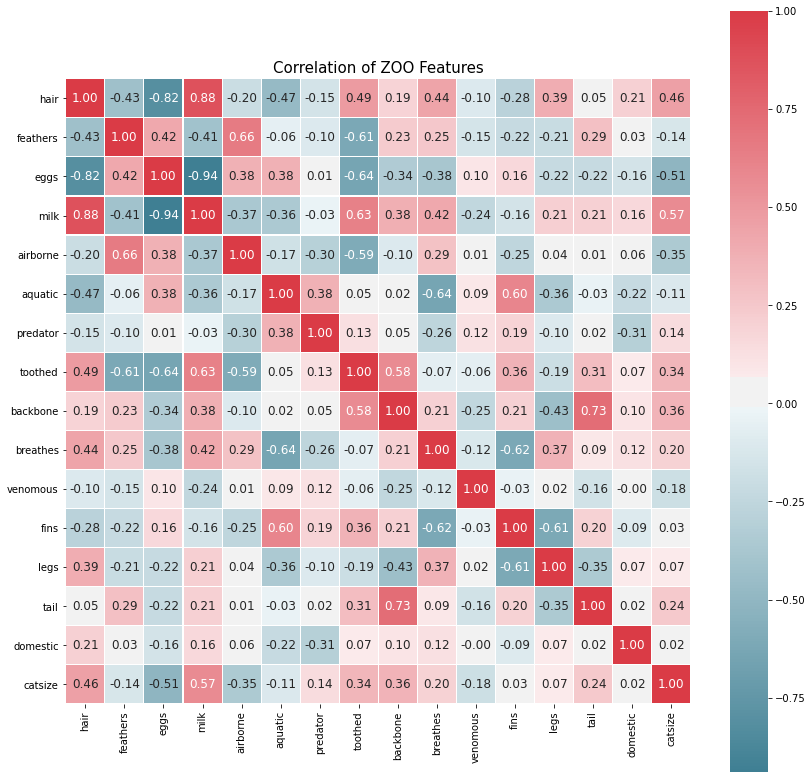

In [8]:
corr = data.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.05, size=15)

In [9]:
def remove_row(df, n, ct):
    df.drop(df.loc[(df.class_type == ct)][:n].index, inplace = True, axis = 0)

1    25
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

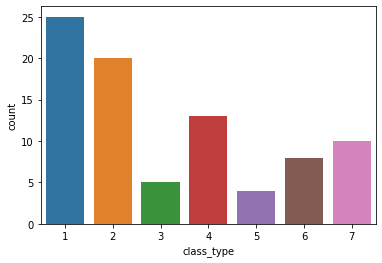

In [10]:
remove_row(data, 16, 1)
sns.countplot(data['class_type'],label="Count")
pd.Series.value_counts(data['class_type'])

In [11]:
def add_rows(df, ct):
    a = df.loc[df.class_type == ct]
    while(len(a) < 25):
        df = df.append(a[:3])
        df = df.sample(frac = 1)
        a = df.loc[df.class_type == ct]
    return df

6    26
3    26
2    26
7    25
5    25
4    25
1    25
Name: class_type, dtype: int64

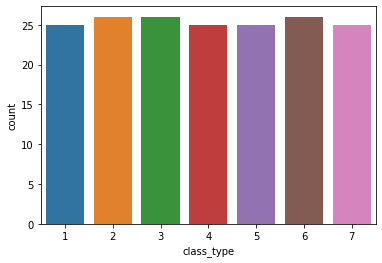

In [12]:
data = add_rows(data, 2)
data = add_rows(data, 3)
data = add_rows(data, 4)
data = add_rows(data, 5)
data = add_rows(data, 7)
data = add_rows(data, 6)
sns.countplot(data['class_type'],label="Count")
pd.Series.value_counts(data['class_type'])

In [13]:
len(data)

178

In [14]:
#remove animal_name as of now
data_no_name = data.drop(['animal_name'], axis = 1)

## Model

In [15]:
def get_wrongvalues(y_test, pred2):
    for i, j in zip(y_test, pred2): 
        if i != j: 
            print("Predicted value: ", j)
            print("Ground Truth: ", i, "\n")

In [16]:
data_no_name.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3


In [17]:
X1 = data_no_name.drop(['class_type'], axis = 1)
y = data_no_name['class_type']

In [18]:
#try for leaf_size 29 and 3 -> check effect on test dataset explicitly
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 123)

### K-Means Clustering

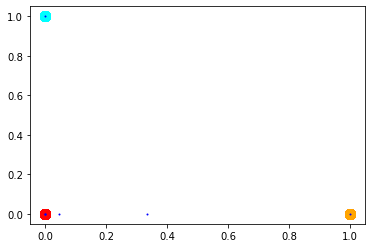

In [19]:
plt.clf()
plt.cla()
X = X_train.to_numpy()

km = KMeans(n_clusters = 7)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 100, c = 'pink', label = 'Bug')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'Mammals')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'Bird')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'Reptile')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'Fish')
plt.scatter(X[y_means == 6, 0], X[y_means == 6, 1], s = 100, c = 'red', label = 'Amphibian')
plt.scatter(X[y_means == 7, 0], X[y_means == 7, 1], s = 100, c = 'green', label = 'Invertebrate')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 1, c = 'blue' , label = 'centeroid')
plt.show()

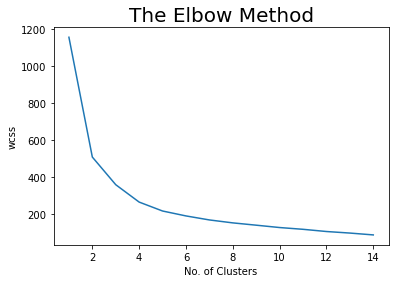

In [20]:
wcss = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

The above graph shows that the optimum number of clusters is 4. But we know that the required number of classes is 7, so ideally, we should have 7 clusters. This contradiction could be because of the class imbalance in the dataset. Due to less examples of a few classes, appropriate clusters for those classes are not formed. 
This is also reflected in the clusters graph above, where only 5 clusters are visible.

In [21]:
pred = km.predict(X_test)
print('accuracy: ', accuracy_score(y_test, pred))
print('recall: ', recall_score(y_test, pred, average = 'macro'))
print('precision: ', precision_score(y_test, pred, average = 'macro'))

accuracy:  0.0
recall:  0.0
precision:  0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
get_wrongvalues(y_test, pred)

Predicted value:  5
Ground Truth:  1 

Predicted value:  4
Ground Truth:  2 

Predicted value:  10
Ground Truth:  6 

Predicted value:  12
Ground Truth:  7 

Predicted value:  9
Ground Truth:  7 

Predicted value:  7
Ground Truth:  3 

Predicted value:  4
Ground Truth:  2 

Predicted value:  3
Ground Truth:  4 

Predicted value:  7
Ground Truth:  3 

Predicted value:  4
Ground Truth:  2 

Predicted value:  3
Ground Truth:  4 

Predicted value:  6
Ground Truth:  3 

Predicted value:  2
Ground Truth:  5 

Predicted value:  13
Ground Truth:  1 

Predicted value:  5
Ground Truth:  1 

Predicted value:  5
Ground Truth:  1 

Predicted value:  4
Ground Truth:  2 

Predicted value:  7
Ground Truth:  5 

Predicted value:  12
Ground Truth:  7 

Predicted value:  9
Ground Truth:  7 

Predicted value:  0
Ground Truth:  6 

Predicted value:  2
Ground Truth:  5 

Predicted value:  8
Ground Truth:  7 

Predicted value:  12
Ground Truth:  7 

Predicted value:  7
Ground Truth:  5 

Predicted value:  5


### Naive Bayes

In [23]:
mNB = MultinomialNB()
gNB = GaussianNB()
mNB.fit(X_train, y_train)
gNB.fit(X_train, y_train)

GaussianNB()

In [24]:
pred = mNB.predict(X_test)
print('accuracy: ', accuracy_score(y_test, pred))
print('recall: ', recall_score(y_test, pred, average = 'macro'))
print('precision: ', precision_score(y_test, pred, average = 'macro'))

accuracy:  0.8333333333333334
recall:  0.8530612244897959
precision:  0.8435374149659864


In [25]:
get_wrongvalues(y_test, pred)

Predicted value:  3
Ground Truth:  7 

Predicted value:  5
Ground Truth:  3 

Predicted value:  2
Ground Truth:  3 

Predicted value:  4
Ground Truth:  7 

Predicted value:  4
Ground Truth:  7 

Predicted value:  5
Ground Truth:  3 



In [26]:
pred2 = gNB.predict(X_test)
print('accuracy: ', accuracy_score(y_test, pred2))
print('recall: ', recall_score(y_test, pred2, average = 'macro'))
print('precision: ', precision_score(y_test, pred2, average = 'macro'))

accuracy:  1.0
recall:  1.0
precision:  1.0


In [27]:
get_wrongvalues(y_test, pred2)

### K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1, 25), 'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size' : np.arange(1, 31)}
knn_gscv = GridSearchCV(knn, param_grid, cv=4)

knn_gscv.fit(X_train, y_train)

In [ ]:
knn_gscv.best_params_

For KNN with k = 1, the object (vector representation) is simply assigned to the class of that single nearest neighbour.

In [ ]:
knn_gscv.best_score_

In [ ]:
knn2 = knn_gscv.best_estimator_
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred, average = 'macro'))
print('precision: ', precision_score(y_test, y_pred, average = 'macro'))

In [ ]:
get_wrongvalues(y_test, y_pred)

In [ ]:
import pickle
filename = 'knn.sav'
pickle.dump(knn2, open(filename, 'wb'))

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred, average = 'macro'))
print('precision: ', precision_score(y_test, y_pred, average = 'macro'))

In [ ]:
get_wrongvalues(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
knn3.get_params()

In [ ]:
knn2.get_params()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
param_grid2 = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'min_samples_split' : [0.5, 2, 3, 4, 5],
    'max_depth' : range(1, 10)
}
dt_gscv = GridSearchCV(decision_tree, param_grid2, cv=5)
dt_gscv.fit(X_train, y_train)

In [ ]:
dt_gscv.best_score_

In [ ]:
dt_gscv.best_estimator_

In [ ]:
dt = dt_gscv.best_estimator_

In [ ]:
# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)
# print('accuracy: ', accuracy_score(y_test, y_pred))
# print('recall: ', recall_score(y_test, y_pred, average = 'macro'))
# print('precision: ', precision_score(y_test, y_pred, average = 'macro'))

In [ ]:
#Asian Hornet - Bug but also invertebrate
test = {
    'hair' : [0],
    'feathers' : [0],
    'eggs' : [1],
    'milk' : [0],
    'airbone' : [1],
    'aquatic' : [0],
    'predator': [1],
    'toothed' : [0],
    'backbone': [0],
    'breathes': [0],
    'venomous': [1],
    'fins': [0],
    'legs':[6],
    'tail':[0],
    'domestic':[0],
    'catsize':[0],
}

df = pd.DataFrame(test, columns = ['hair',
    'feathers',
    'eggs',
    'milk',
    'airbone',
    'aquatic',
    'predator',
    'toothed',
    'backbone',
    'breathes',
    'venomous',
    'fins',
    'legs',
    'tail',
    'domestic',
    'catsize'])

df

In [ ]:
y_pred1 = knn3.predict(df)
y_pred1

In [ ]:
y_pred2 = knn2.predict(df)
y_pred2

In [ ]:
dt.predict(df)

In [ ]:
km.predict(df)

In [ ]:
mNB.predict(df)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(dt)
print(text_representation)

In [ ]:
#how to visualize multidim knn output?

As we see, most classifiers find it difficult to distinguish between class 3 and 4. This is primarily because of 2 reasons, one, that the features for some reptiles and fish are similar and two, because the number of examples of reptiles in the training dataset are fewer. This results in the classifiers to miss out on some important features that could help to distinguish these creatures.

In [ ]:
#Whale - Mammal
test = {
    'hair' : [0],
    'feathers' : [0],
    'eggs' : [0],
    'milk' : [1],
    'airbone' : [0],
    'aquatic' : [1],
    'predator': [1],
    'toothed' : [1],
    'backbone': [1],
    'breathes': [1],
    'venomous': [0],
    'fins': [1],
    'legs':[0],
    'tail':[1],
    'domestic':[0],
    'catsize':[1],
}

df = pd.DataFrame(test, columns = ['hair',
    'feathers',
    'eggs',
    'milk',
    'airbone',
    'aquatic',
    'predator',
    'toothed',
    'backbone',
    'breathes',
    'venomous',
    'fins',
    'legs',
    'tail',
    'domestic',
    'catsize'])

df

In [ ]:
dt.predict(df)

In [ ]:
knn2.predict(df)

In [ ]:
km.predict(df)

In [ ]:
mNB.predict(df)